# Common Time Series Data Analysis Methods and Forecasting Models in Python


## Analyzing time series data for forecasting using ARIMA and LSTM models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error
from sklearn import base
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import *
import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams.update({'figure.figsize': (10,10)})

## 1. Time Series Data Preprocessing
### 1.1 Loading Data

In [3]:
df_raw = pd.read_csv('./data/GlobalTemperatures.csv', parse_dates=['dt'], index_col='dt')
df_raw.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_raw.shape

(3192, 8)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB


In [6]:
df = df_raw['LandAverageTemperature']

### 1.2 Handling Missing Data

In [7]:
df.isnull().value_counts()

False    3180
True       12
Name: LandAverageTemperature, dtype: int64

In [8]:
df = df.ffill()

In [9]:
df.isnull().value_counts()

False    3192
Name: LandAverageTemperature, dtype: int64

## 2. Time Series Data Analysis

### 2.1 Visualizing Data

Text(0, 0.5, 'Temperature')

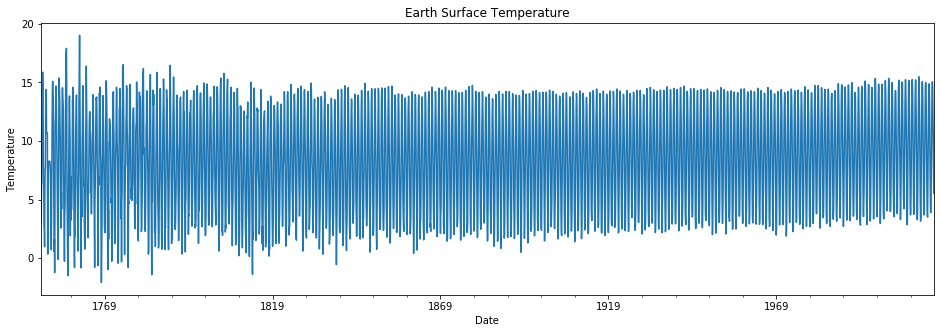

In [10]:
ax = df.plot(figsize=(16,5), title='Earth Surface Temperature')
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")

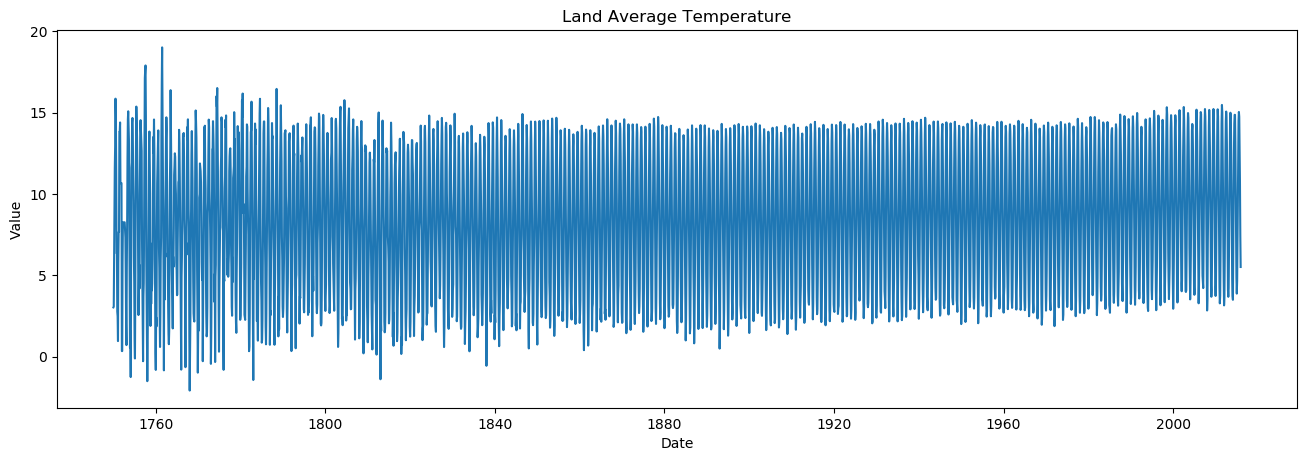

In [11]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df, title='Land Average Temperature') 

### 2.2 Decomposing Data into Components

In [12]:
additive = seasonal_decompose(df, model='additive', extrapolate_trend='freq')

Text(0.5, 0.98, 'Additive Decompose')

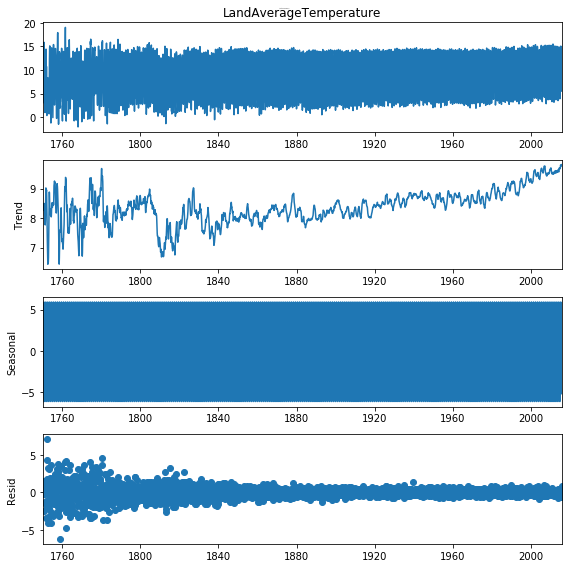

In [13]:
plt.rcParams.update({'figure.figsize': (8,8)})
additive.plot().suptitle('Additive Decompose', fontsize=0)

In [14]:
additive_df = pd.concat([additive.seasonal, additive.trend, additive.resid, additive.observed], axis=1)
additive_df.columns = ['seasonal', 'trend', 'resid', 'actual_values']
additive_df.head(15)

,seasonal,trend,resid,actual_values
dt,,,,
1750-01-01,-6.097202,8.331978,0.799224,3.034
1750-02-01,-5.420535,8.317544,0.185991,3.083
1750-03-01,-3.415553,8.303111,0.738442,5.626
1750-04-01,-0.124626,8.288678,0.325948,8.490
1750-05-01,2.754980,8.274245,0.543775,11.573
1750-06-01,4.949659,8.259812,-0.272471,12.937
1750-07-01,5.907329,8.500875,1.459796,15.868
1750-08-01,5.363052,8.390083,0.996865,14.750
1750-09-01,3.333349,8.309000,-0.229349,11.413


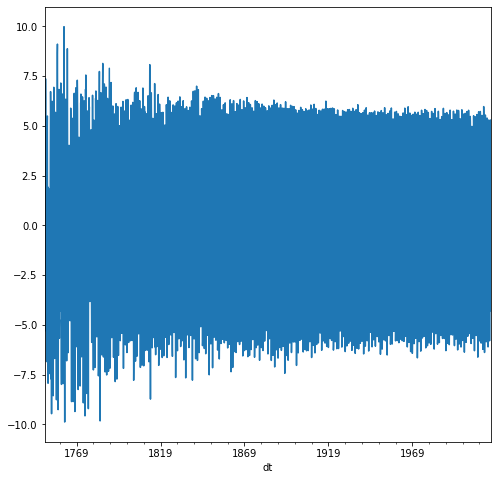

In [15]:
detrended = df.values - additive.trend
detrended.plot()

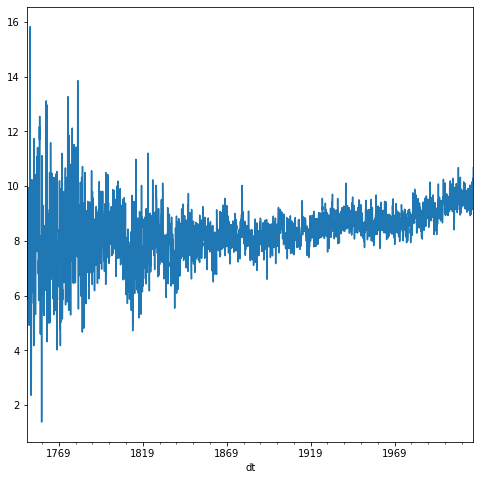

In [16]:
deseasonalized = df.values - additive.seasonal
deseasonalized.plot()

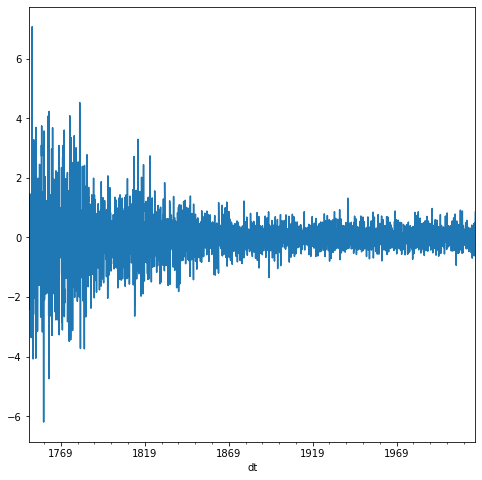

In [17]:
deseasonalized_detrended = deseasonalized - additive.trend
deseasonalized_detrended.plot()

In [18]:
'''
mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (8,8)})
mul.plot().suptitle('Multiplicative Decompose', fontsize=0)
'''

"\nmul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')\nplt.rcParams.update({'figure.figsize': (8,8)})\nmul.plot().suptitle('Multiplicative Decompose', fontsize=0)\n"

## 3. Time Series Forecosting

### 3.1 ARIMA Model

Text(0, 0.5, 'Temperature')

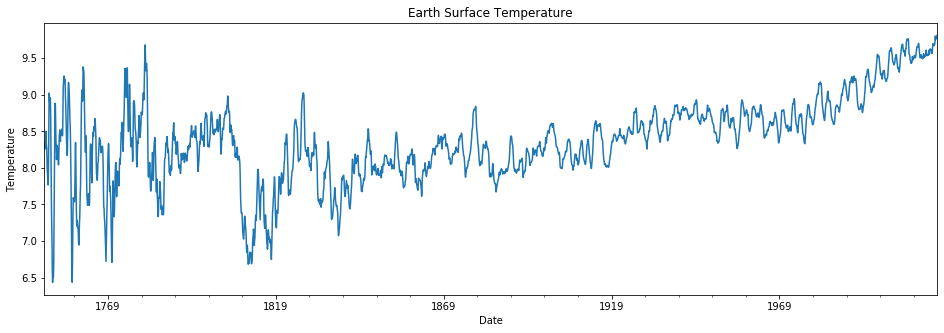

In [19]:
trend = additive.trend

ax = trend.plot(figsize=(16,5), title='Earth Surface Temperature')
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(trend.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.344774
p-value: 0.012992


In [21]:
result = adfuller(trend.values, regression='nc')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.485797
p-value: 0.821598


Text(0.5, 0.98, '2nd Order Differencing')

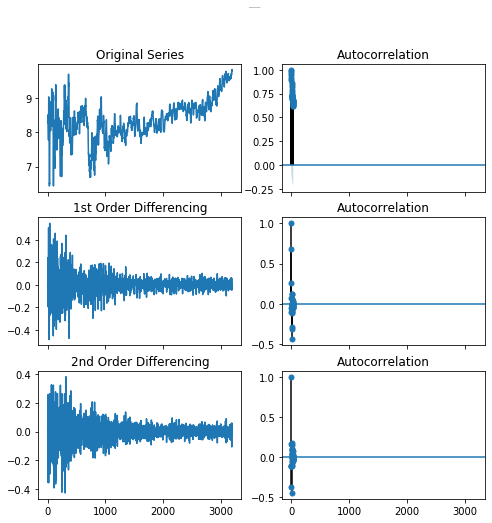

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(trend.values); axes[0, 0].set_title('Original Series')
plot_acf(trend.values, ax=axes[0, 1]).suptitle('Original Series', fontsize=0)

# 1st Differencing
diff1 = trend.diff().dropna()
axes[1, 0].plot(diff1.values)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.values, ax=axes[1, 1]).suptitle('1st Order Differencing', fontsize=0)

# 2nd Differencing
diff2 = trend.diff().diff().dropna()
axes[2, 0].plot(diff2.values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.values, ax=axes[2, 1]).suptitle('2nd Order Differencing', fontsize=0)

Text(0.5, 0.98, '1st Order Differencing')

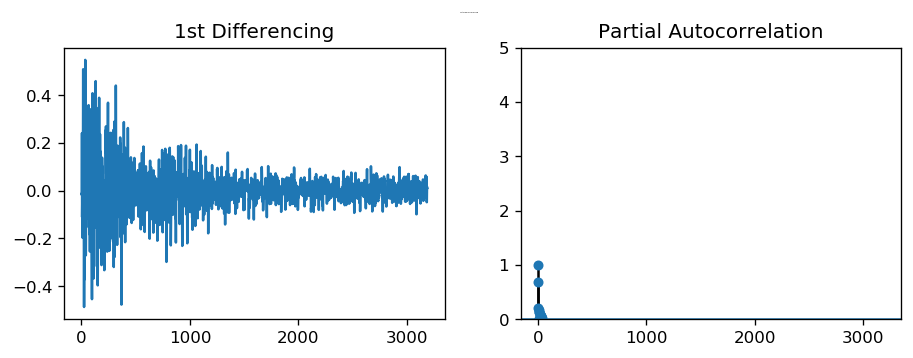

In [23]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values)
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(diff1.values, ax=axes[1]).suptitle('1st Order Differencing', fontsize=0)

## ACF and PACF

* use ACF to find q for MA
* use PACF to find p for AR

Text(0.5, 0.98, '1st Order Differencing')

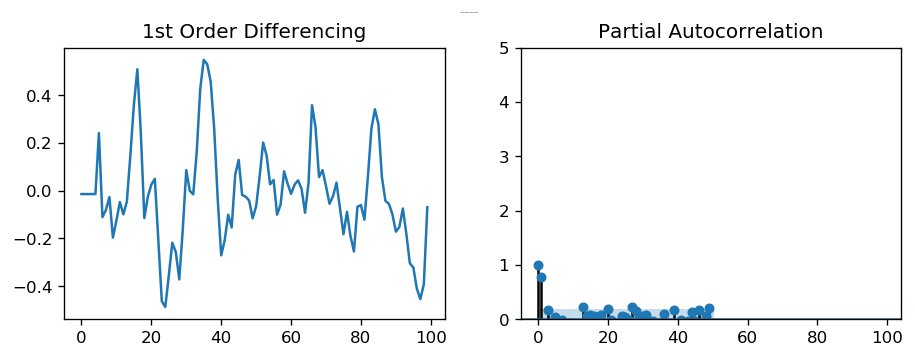

In [24]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

size = 100

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(diff1.values[:size], lags=50, ax=axes[1]).suptitle('1st Order Differencing', fontsize=0)

Text(0.5, 0.98, '1st Order Differencing')

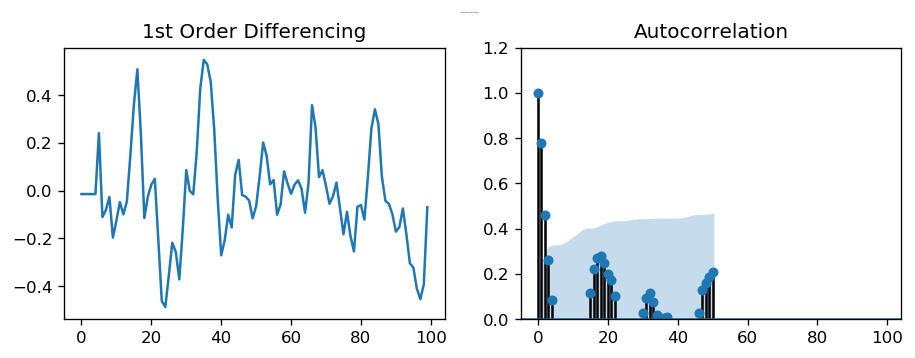

In [25]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

size = 100

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(diff1.values[:size], lags=50, ax=axes[1]).suptitle('1st Order Differencing', fontsize=0)

In [52]:
from statsmodels.tsa.arima_model import ARIMA

train = trend[:3000]
test  = trend[3000:]

model = ARIMA(train, order=(1, 1, 1))  
model = model.fit(disp=0)  
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.trend   No. Observations:                 2999
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4891.747
Method:                       css-mle   S.D. of innovations              0.047
Date:                Sun, 21 Jun 2020   AIC                          -9775.493
Time:                        20:25:41   BIC                          -9751.469
Sample:                    02-01-1750   HQIC                         -9766.852
                         - 12-01-1999                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.002      0.074      0.941      -0.004       0.005
ar.L1.D.trend     0.2650      0.018     14.937      0.000       0.230       0.300
ma.L1.D.trend     0.9985      0.002    4

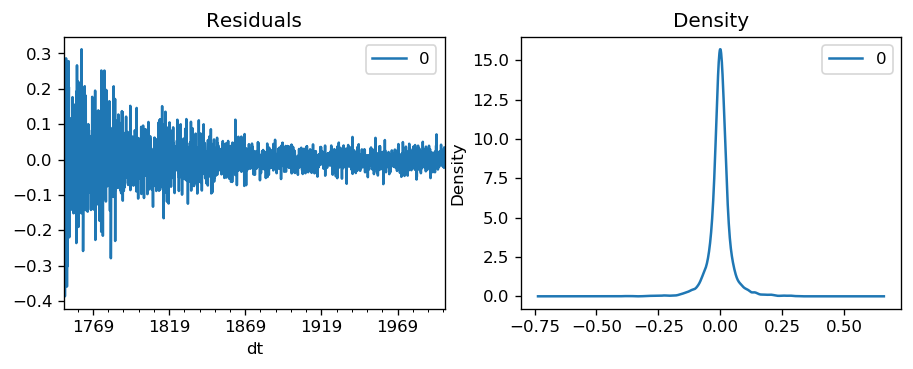

In [54]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

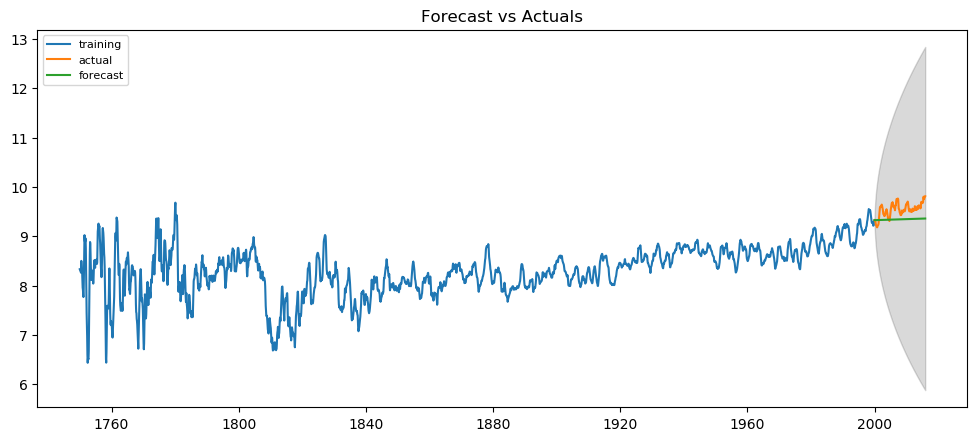

In [53]:
# Forecast
fc, se, conf = model.forecast(192, alpha=0.05)  # 192 testing samples, 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

### 3.2 LSTM Model
* https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [29]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Using TensorFlow backend.


In [30]:
# define input sequence
raw_seq = trend.tolist()
# choose a number of time steps
n_steps = 12
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(2):
    print(X[i], y[i])

[8.33197752 8.31754439 8.30311126 8.28867813 8.274245   8.25981187
 8.500875   8.39008333 8.309      8.28208333 8.08529167 7.95975   ] 7.911791666666666
[8.31754439 8.30311126 8.28867813 8.274245   8.25981187 8.500875
 8.39008333 8.309      8.28208333 8.08529167 7.95975    7.91179167] 7.812374999999999


In [31]:
X.shape, y.shape

((3180, 12), (3180,))

In [32]:
X_train = X[:3000]
y_train = y[:3000]
X_test  = X[3000:]
y_test  = y[3000:]

In [33]:
n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
3000/3000 [==============================] - 1s 259us/step - loss: 5.1924
Epoch 2/200
3000/3000 [==============================] - 0s 155us/step - loss: 0.1340
Epoch 3/200
3000/3000 [==============================] - 0s 163us/step - loss: 0.0497
Epoch 4/200
3000/3000 [==============================] - 0s 157us/step - loss: 0.0389
Epoch 5/200
3000/3000 [==============================] - 0s 163us/step - loss: 0.0384
Epoch 6/200
3000/3000 [==============================] - 0s 162us/step - loss: 0.0344
Epoch 7/200
3000/3000 [==============================] - 0s 164us/step - loss: 0.0335
Epoch 8/200
3000/3000 [==============================] - 0s 150us/step - loss: 0.0329
Epoch 9/200
3000/3000 [==============================] - 0s 161us/step - loss: 0.0315
Epoch 10/200
3000/3000 [==============================] - 0s 161us/step - loss: 0.0283
Epoch 11/200
3000/3000 [==============================] - 0s 165us/step - loss: 0.0262
Epoch 12/200
3000/3000 [============================

3000/3000 [==============================] - 0s 142us/step - loss: 0.0037
Epoch 96/200
3000/3000 [==============================] - 0s 138us/step - loss: 0.0035
Epoch 97/200
3000/3000 [==============================] - 0s 142us/step - loss: 0.0037
Epoch 98/200
3000/3000 [==============================] - 0s 147us/step - loss: 0.0037
Epoch 99/200
3000/3000 [==============================] - 0s 149us/step - loss: 0.0039
Epoch 100/200
3000/3000 [==============================] - 0s 148us/step - loss: 0.0032
Epoch 101/200
3000/3000 [==============================] - 0s 145us/step - loss: 0.0030
Epoch 102/200
3000/3000 [==============================] - 0s 143us/step - loss: 0.0031
Epoch 103/200
3000/3000 [==============================] - 0s 143us/step - loss: 0.0038
Epoch 104/200
3000/3000 [==============================] - 0s 145us/step - loss: 0.0032
Epoch 105/200
3000/3000 [==============================] - 0s 144us/step - loss: 0.0028
Epoch 106/200
3000/3000 [=========================

3000/3000 [==============================] - 0s 140us/step - loss: 0.0024
Epoch 189/200
3000/3000 [==============================] - 0s 143us/step - loss: 0.0029
Epoch 190/200
3000/3000 [==============================] - 0s 150us/step - loss: 0.0029
Epoch 191/200
3000/3000 [==============================] - 0s 165us/step - loss: 0.0025
Epoch 192/200
3000/3000 [==============================] - 1s 179us/step - loss: 0.0027
Epoch 193/200
3000/3000 [==============================] - 0s 164us/step - loss: 0.0031
Epoch 194/200
3000/3000 [==============================] - 0s 166us/step - loss: 0.0029
Epoch 195/200
3000/3000 [==============================] - 0s 165us/step - loss: 0.0025
Epoch 196/200
3000/3000 [==============================] - 0s 153us/step - loss: 0.0028
Epoch 197/200
3000/3000 [==============================] - 0s 146us/step - loss: 0.0030
Epoch 198/200
3000/3000 [==============================] - 0s 151us/step - loss: 0.0030
Epoch 199/200
3000/3000 [=====================

In [34]:
# demonstrate prediction
x_input = array([8.33197752, 8.31754439, 8.30311126, 8.28867813, 8.274245, 8.25981187,
                 8.500875,   8.39008333, 8.309,      8.28208333, 8.08529167, 7.95975])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[7.918321]]


In [35]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose=0)

In [36]:
X_test.shape, y_pred.shape

((180, 12, 1), (180, 1))

In [37]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

0.036435336247113356

In [38]:
y_pred_1 = y_pred.reshape((y_pred.shape[0]))
y_pred_series = pd.Series(y_pred_1)

In [39]:
y_test_1 = y_test.reshape((y_test.shape[0]))
y_test_series = pd.Series(y_test_1)

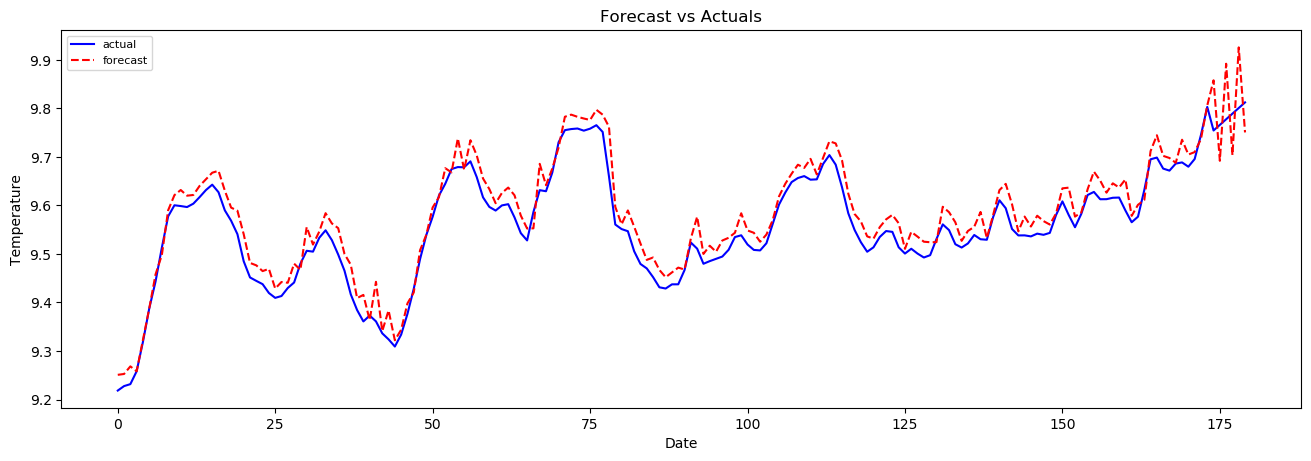

In [57]:
def plot_forecosting(df1, df2, line_stype1='b-', line_stype2='r--', title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(df1.index, df1, line_stype1, label='actual') 
    plt.plot(df2.index, df2, line_stype2, label='forecast')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

plot_forecosting(y_test_series, y_pred_series, title='Land Average Temperature') 

In [41]:
X_all = X.reshape((X.shape[0], X.shape[1], n_features))

In [42]:
y_pred_all = model.predict(X_all, verbose=0)

In [43]:
y_pred_all_1 = y_pred_all.reshape((y_pred_all.shape[0]))
y_pred_all_series = pd.Series(y_pred_all_1)

In [44]:
y_all = y.reshape((y.shape[0]))
y_all_series = pd.Series(y_all)

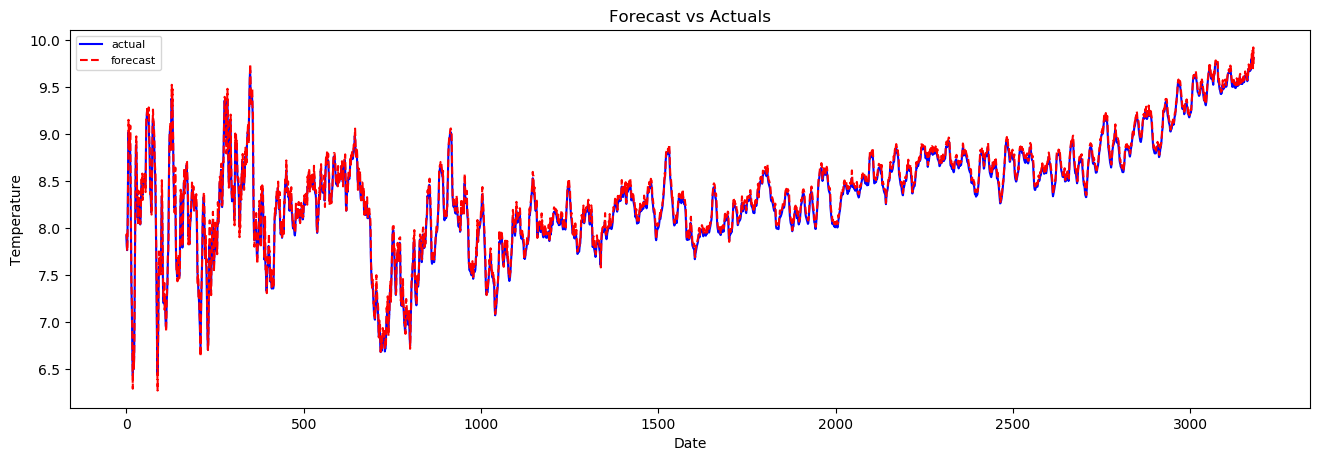

In [58]:
plot_forecosting(y_all_series, y_pred_all_series, title='Land Average Temperature') 